Auto pipeline text2image: stable-diffusion-1.5 | cuda rendering | rendering time: ~10sek.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")
prompt = "realistic people on meeting, office 4k, moon"
negative_prompt = "ugly, nsfw, nude, naked"
pipeline.enable_attention_slicing()
image = pipeline(prompt, negative_prompt=negative_prompt, height=512, width=768, guidance_scale=10.5).images[0]
image

StableDiffusionPipeline text2image: dreamlike-photoreal-2.0 | cuda rendering | rendering time: ~13sek.

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

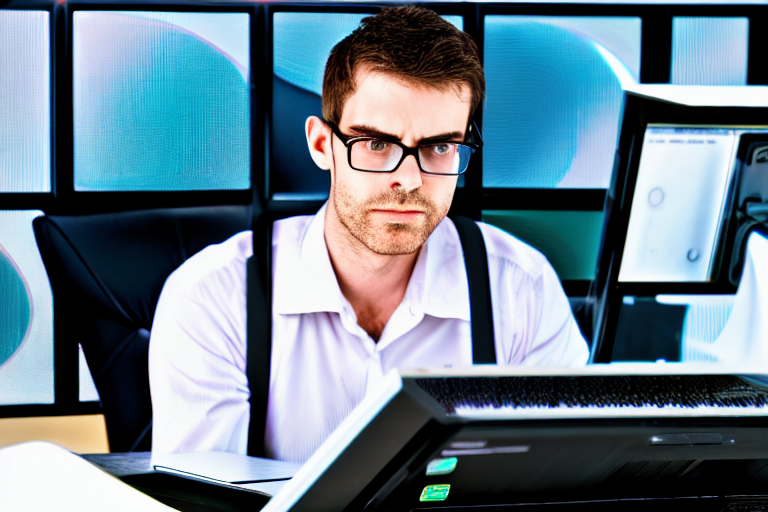

In [28]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = ""
neg_prompt = "ugly face, nsfw, nude"
generator = [torch.Generator(device="cuda").manual_seed(1)]
image = pipe(prompt, generator=generator, num_inference_steps=50, width=768, height=512).images[0]

image

StableDiffusionPipeline text2image: dreamlike-photoreal-2.0 | cuda rendering | rendering time: ~43sek. | output: 3 images

In [ ]:
from diffusers import StableDiffusionPipeline
from diffusers.utils import make_image_grid
import torch

model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "laptop on wooden desk, some paperwork with graphes"
# define generator with random seed number for future usage
# generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]
# 
# rendering images with generator and seeds defined
# images = pipe(prompt, generator=generator, num_images_per_prompt=4).images
# make_image_grid(images, rows=2, cols=2)
# 
images = pipe(prompt,num_images_per_prompt=3, num_inference_steps=50).images
# image = pipe(prompt, num_inference_steps=25).images[0]
make_image_grid(images, rows=1, cols=3)

Text2image model: stabilityai/stable-diffusion-xl-base-1.0 | cuda rendering | rendering time: ~23sek. | output: 1 image | aspect ration 3:2 (1536x1024) -> rendering time ~

In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "man in front of computer"
neg_prompt = ""
image = pipe(prompt=prompt, negative_prompt=neg_prompt, width=768, height=512).images[0]
image